## Importing Libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


## Reading dataset

In [2]:
data = pd.read_csv("../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")
data.head(100)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0
96,12.180,17.84,77.79,451.1,0.10450,1
97,9.787,19.94,62.11,294.5,0.10240,1
98,11.600,12.84,74.34,412.6,0.08983,1


## Check for skewed classes

In [3]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [4]:
benign_data = data[data['diagnosis'] == 0]
malignant_data = data[data['diagnosis'] == 1]

In [5]:
benign_data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [6]:
malignant_data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1
48,12.050,14.63,78.04,449.3,0.10310,1
49,13.490,22.30,86.91,561.0,0.08752,1
50,11.760,21.60,74.72,427.9,0.08637,1
51,13.640,16.34,87.21,571.8,0.07685,1
52,11.940,18.24,75.71,437.6,0.08261,1


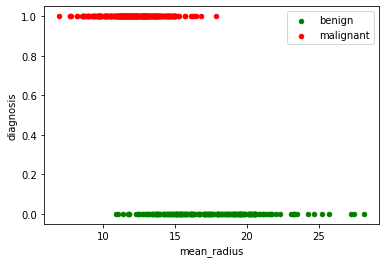

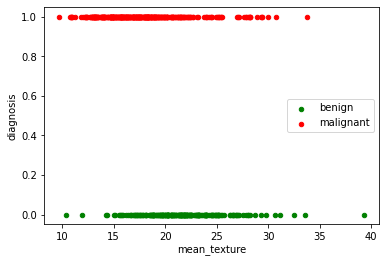

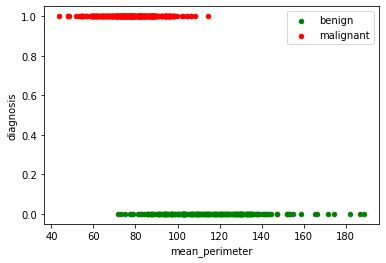

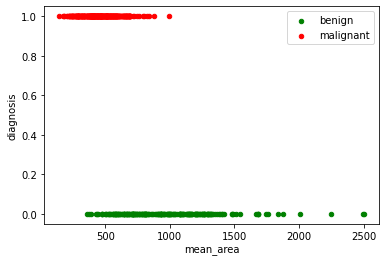

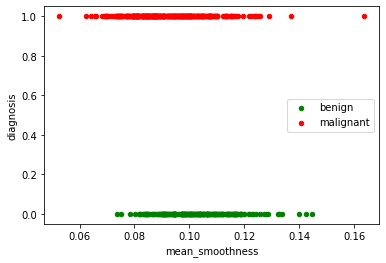

In [7]:
attributes = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]

for attr in attributes:
    b = benign_data.plot(kind='scatter', x=attr, y='diagnosis', label='benign', color='g')
    m = malignant_data.plot(kind='scatter', x=attr, y='diagnosis', label='malignant', color='r', ax=b)

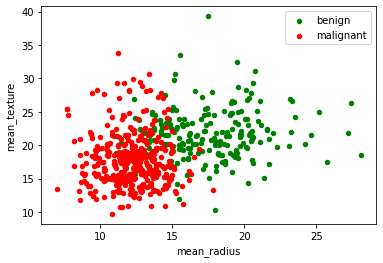

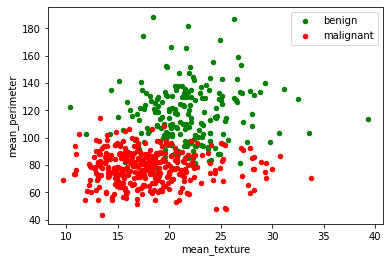

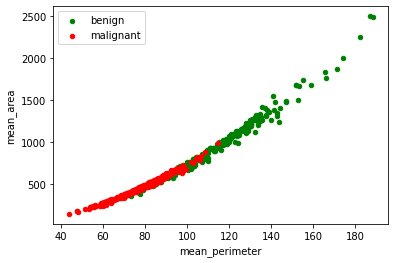

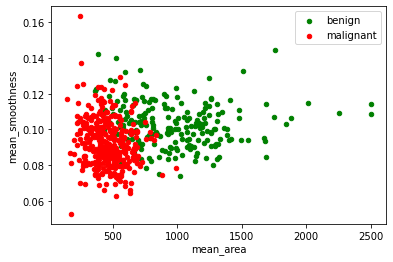

In [8]:
for i in range(len(attributes) - 1):
    b = benign_data.plot(kind='scatter', x=attributes[i], y=attributes[i + 1], label='benign', color='g')
    m = malignant_data.plot(kind='scatter', x=attributes[i], y=attributes[i + 1], label='malignant', color='r', ax=b)

In [9]:
X = np.asarray(data[["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"]])
y = np.asarray(data[["diagnosis"]])

## Split dataset

In [10]:
y = np.ravel(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 5)
(114, 5)
(455,)
(114,)


## Define SVM classifier with two different type of kernel function

In [13]:
def create_and_train_model(X_train, y_train, X_test, y_test):
    kernels = ['linear', 'rbf']

    for kernel in kernels:
        model = svm.SVC(kernel=kernel)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print('-' * 100)
    
    return model

In [14]:
create_and_train_model(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        34
           1       0.97      0.89      0.93        80

    accuracy                           0.90       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.92      0.90      0.91       114

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.90      0.93      0.91        80

    accuracy                           0.88       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.88      0.88      0.88       114

----------------------------------------------------------------------------------------------------


SVC()

## Writing SVM from scratch

In [15]:
import statsmodels.api as sm  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle


## Feature selection and remove correlated features

[Feature selection methods](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)

### Information Gain

In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

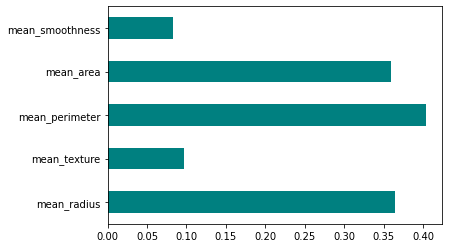

In [17]:
importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, data.columns[0: len(data.columns) - 1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [18]:
selected_feat = []
for feature, importance in feat_importances.items():
    if importance > 0.3:
        selected_feat.append(feature)


refined_X = np.asarray(data[selected_feat])
refined_y = np.asarray(data[["diagnosis"]])

refined_y = np.ravel(refined_y)

X_train, X_test, y_train, y_test = train_test_split(refined_X, refined_y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 3)
(114, 3)
(455,)
(114,)


In [19]:
create_and_train_model(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.96      0.90      0.93        80

    accuracy                           0.90       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.91      0.90      0.91       114

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.90      0.93      0.91        80

    accuracy                           0.88       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.88      0.88      0.88       114

----------------------------------------------------------------------------------------------------


SVC()

### Chi-square Test
mainly used for dataset in which features are categorical.

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
# Convert to categorical
X_cat = X.astype(int)

# three features with highest chi-squared statistics
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X_cat, y)

print(X.shape)
print(X_kbest_features.shape)

(569, 5)
(569, 2)


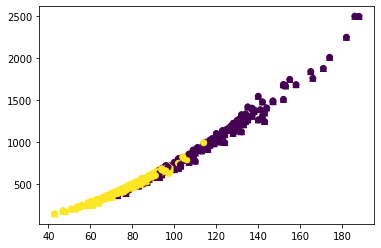

In [22]:
plt.scatter(X_kbest_features[:, 0], X_kbest_features[:, 1], marker='^', c=y)
plt.scatter(X_kbest_features[:, 0], X_kbest_features[:, 1], marker='o', c=y)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=4)
create_and_train_model(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        34
           1       0.95      0.86      0.90        80

    accuracy                           0.87       114
   macro avg       0.84      0.87      0.85       114
weighted avg       0.88      0.87      0.87       114

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.91      0.93      0.92        80

    accuracy                           0.89       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.89      0.89      0.89       114

----------------------------------------------------------------------------------------------------


SVC()

### Correlation Coefficient
select features that are highly uncorrelated.

<AxesSubplot:>

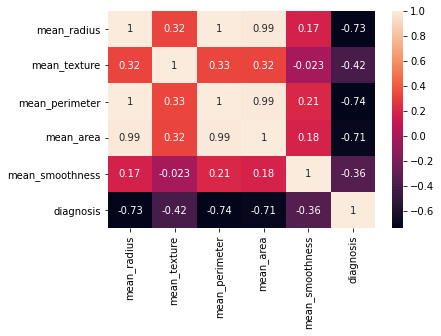

In [24]:
import seaborn as sns

cor = data.corr()
sns.heatmap(cor, annot=True)

#### Plot two highly correlated features and uncorrelated features

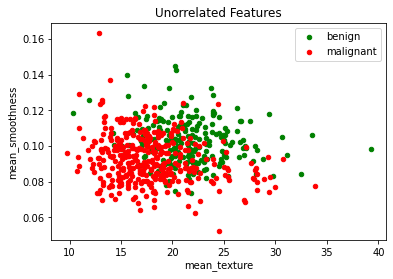

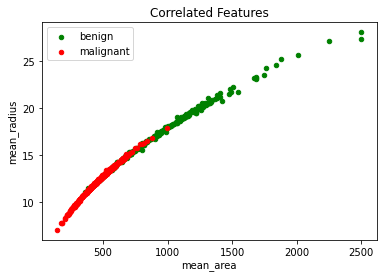

In [25]:
b = benign_data.plot(kind='scatter', x=attributes[1], y=attributes[4], label='benign', color='g')
m = malignant_data.plot(kind='scatter', x=attributes[1], y=attributes[4], label='malignant', color='r', ax=b, title="Unorrelated Features")

b = benign_data.plot(kind='scatter', x=attributes[3], y=attributes[0], label='benign', color='g')
m = malignant_data.plot(kind='scatter', x=attributes[3], y=attributes[0], label='malignant', color='r', ax=b, title="Correlated Features")